# Visualising the data

In this notebook, we will guide you through visualising the data you downloaded through the API in the form of graphs. In the process we introduce ```pandas```, a very popular data processing library. Entire books have been written on the  ```pandas``` library, and there is an extensive online [documentation](https://pandas.pydata.org/docs/); in this notebook, we will restrict ourselves to the minimum required to use the library as a wrapper for ```matplotlib```, a lower-level data visualisation library.

Both ```pandas``` and ```matplotlib``` are installed on the QMUL JupyterHub server, and they are likely to be part of any major Python distribution, so the following ```import``` statements should just work. Installation instructions for [pandas](https://pandas.pydata.org/docs/getting_started/install.html) and [matplotlib](https://matplotlib.org/users/installing.html) are available online.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json

In [6]:
# an iPython  "magic" that enables the embedding of matplotlib output
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

## Time series data

We start by loading the data from the JSON file in which we saved it. Reading a JSON file in Python is not any more difficult than writing it:

In [44]:
with open("admissions.json", "rt") as INFILE:
    admissions=json.load(INFILE)
with open("cases.json", "rt") as INFILE:
    cases=json.load(INFILE)
with open("deaths.json", "rt") as INFILE:
    deaths=json.load(INFILE)

### Wrangling the data

Whatever your query, the data is unlikely to come in a form that's amenable to be plotted directly; some wrangling, munging, or other bit of cool data science jargon is required. Our aim is to extract values for the *x* axis of our plot (in this case the dates). These will become the *index* of a ```DataFrame```, of which the *columns* will contain the data proper. You can, for the moment, think of a ```DataFrame``` as the Python equivalent of an Excel spreadsheet.

In [45]:
cases[:5]

[{'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'COVID-19',
  'geography_type': 'Nation',
  'geography': 'England',
  'geography_code': 'E92000001',
  'metric': 'COVID-19_cases_casesByDay',
  'metric_group': 'cases',
  'stratum': 'default',
  'sex': 'all',
  'age': 'all',
  'year': 2020,
  'month': 1,
  'epiweek': 5,
  'date': '2020-01-30',
  'metric_value': 1.0,
  'in_reporting_delay_period': False},
 {'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'COVID-19',
  'geography_type': 'Nation',
  'geography': 'England',
  'geography_code': 'E92000001',
  'metric': 'COVID-19_cases_casesByDay',
  'metric_group': 'cases',
  'stratum': 'default',
  'sex': 'all',
  'age': 'all',
  'year': 2020,
  'month': 1,
  'epiweek': 5,
  'date': '2020-01-31',
  'metric_value': 0.0,
  'in_reporting_delay_period': False},
 {'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'COVID-19',
  'geography_type': 'Nation',
  'geography': 'Englan

As we can see, the data consists of a list of dictionaries; actual data is stored in the inner dictionaries under the ```date``` and ```metric_value``` keys. Let us start by retrieving those values and bringing everything together into a dictionary with the dates as keys, and inner dictionaries with the three metrics as values:

In [46]:
data={}
for dataset in [admissions, cases, deaths]:
    for entry in dataset:
        date=entry['date']
        metric=entry['metric']
        value=entry['metric_value']
        if date not in data:
            data[date]={}
        data[date][metric]=value

In [47]:
data

{'2020-01-30': {'COVID-19_cases_casesByDay': 1.0},
 '2020-01-31': {'COVID-19_cases_casesByDay': 0.0},
 '2020-02-01': {'COVID-19_cases_casesByDay': 0.0},
 '2020-02-02': {'COVID-19_cases_casesByDay': 1.0},
 '2020-02-03': {'COVID-19_cases_casesByDay': 18.0},
 '2020-02-04': {'COVID-19_cases_casesByDay': 0.0},
 '2020-02-05': {'COVID-19_cases_casesByDay': 1.0},
 '2020-02-06': {'COVID-19_cases_casesByDay': 0.0},
 '2020-02-07': {'COVID-19_cases_casesByDay': 0.0},
 '2020-02-08': {'COVID-19_cases_casesByDay': 3.0},
 '2020-02-09': {'COVID-19_cases_casesByDay': 1.0},
 '2020-02-10': {'COVID-19_cases_casesByDay': 1.0},
 '2020-02-11': {'COVID-19_cases_casesByDay': 4.0},
 '2020-02-12': {'COVID-19_cases_casesByDay': 1.0},
 '2020-02-13': {'COVID-19_cases_casesByDay': 1.0},
 '2020-02-14': {'COVID-19_cases_casesByDay': 0.0},
 '2020-02-15': {'COVID-19_cases_casesByDay': 0.0},
 '2020-02-16': {'COVID-19_cases_casesByDay': 0.0},
 '2020-02-17': {'COVID-19_cases_casesByDay': 1.0},
 '2020-02-18': {'COVID-19_case

Note that some of the metrics are missing for some dates, and the keys ate not sorted by date, but by insertion:

In [12]:
data['2020-06-01']

{'e-coli_testing_bacteriuriaPercentTestedRollingMonthGP': 97.69}

We then want to extract all the dates and sort them. Luckily, with dates written year-first, alphabetical ordering does the trick.

In [48]:
dates=list(data.keys())
dates.sort()
dates

['2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-

Do not assume this is a proper time series: some dates might be missing. At any rate, we find the earliest and latest date and convert them to the ```pandas``` type for representing dates.

In [49]:
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

In [50]:
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print (startdate, ' to ', enddate)

2020-01-30 00:00:00  to  2025-10-15 00:00:00


We are now ready to define our ```DataFrame```. To start with, we create an index as a ```date_range```: this is the date analog of a ```range``` for integers, and it will include any dates that may be missing from our list.
We then proceed to define the ```DateFrame``` by specifying its index and the title of its columns.

In [51]:
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['cases', 'admissions', 'deaths'])
timeseriesdf

,cases,admissions,deaths
2020-01-30,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN
2020-02-03,NaN,NaN,NaN
...,...,...,...
2025-10-11,NaN,NaN,NaN
2025-10-12,NaN,NaN,NaN
2025-10-13,NaN,NaN,NaN
2025-10-14,NaN,NaN,NaN


As you can see, the ```DataFrame``` resembles a spreadsheet, or if you want a matrix with labels. We now proceed to fill it in with values from our three statistics. Note that there are many ways of filling in a ```DataFrame```: this is probably not the most efficient, but it is in my view the easiest to understand and one of those that give you more control over the values you enter.

In [53]:
# translate the columns to our metrics
metrics ={'cases': 'acute-bronchiolitis_syndromic_emergencyDepartment_baselineCountsByDay',
          'admissions': 'acute-bronchiolitis_syndromic_emergencyDepartment_baselineCountsByDay',
          'deaths': 'acute-bronchiolitis_syndromic_emergencyDepartment_baselineCountsByDay'}

for date, entry in data.items(): # each entry is a dictionary with cases, admissions and deaths
    pd_date=parse_date(date) # convert to Pandas format
    for column in ['cases', 'admissions', 'deaths']: 
        metric_name=metrics[column]
        # do not assume all values are there for every date - if a value is not available, insert a 0.0
        value= entry.get(metric_name, 0.0)
        # this is the way you access a specific location in the dataframe - use .loc
        # and put index,column in a single set of [ ]
        timeseriesdf.loc[date, column]=value
            
# fill in any remaining "holes" due to missing dates
timeseriesdf.fillna(0.0, inplace=True)
            
timeseriesdf

,cases,admissions,deaths
2020-01-30,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0
2020-02-03,0.0,0.0,0.0
...,...,...,...
2025-10-11,0.0,0.0,0.0
2025-10-12,0.0,0.0,0.0
2025-10-13,0.0,0.0,0.0
2025-10-14,0.0,0.0,0.0


### Plotting

Creating a basic plot of our data is now dead easy. We just need to call the ```plot()``` method on our ```DataFrame```; this will call the underlying ```matplot.pyplot``` functions to create a plot of the data. For more options and fancier graphs, see the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

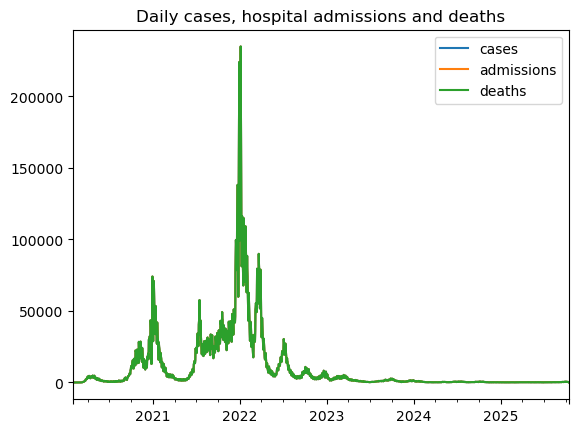

In [30]:
ax=timeseriesdf.plot() # easy peasy...
ax.set_title('Daily cases, hospital admissions and deaths');

After lording it for centuries over engineering calculations up to the advent of computers, logarithms had never been so popular as they have become since the rise of Covid dashboards - now everybody and their uncle knows what a log scale is. There is a reason for that: exponential phenomena are well suited for plotting on log scales, where an exponential propagation becomes a straight line. You wouldn't want to miss out on this centuries-old fad:

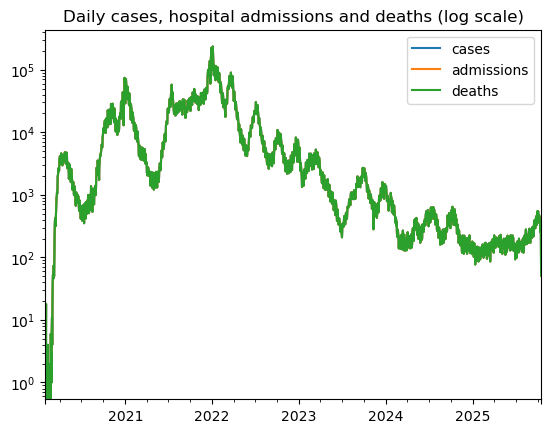

In [31]:
ax=timeseriesdf.plot(logy=True) # ...lemon squeezy
ax.set_title('Daily cases, hospital admissions and deaths (log scale)');

## Lineage data

As a second example, let's lineage data. The data scructure, as you can see, is a bit different, so this will be another good exercise in data wrangling.

In [32]:
with open("lineage.json", "rt") as INFILE:
    lineage=json.load(INFILE)

In [33]:
lineage[:5]

[{'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'COVID-19',
  'geography_type': 'Nation',
  'geography': 'England',
  'geography_code': 'E92000001',
  'metric': 'COVID-19_cases_lineagePercentByWeek',
  'metric_group': 'cases',
  'stratum': 'Omicron BA.5',
  'sex': 'all',
  'age': 'all',
  'year': 2021,
  'month': 1,
  'epiweek': 1,
  'date': '2021-01-04',
  'metric_value': 0.01,
  'in_reporting_delay_period': False},
 {'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'COVID-19',
  'geography_type': 'Nation',
  'geography': 'England',
  'geography_code': 'E92000001',
  'metric': 'COVID-19_cases_lineagePercentByWeek',
  'metric_group': 'cases',
  'stratum': 'Alpha',
  'sex': 'all',
  'age': 'all',
  'year': 2021,
  'month': 1,
  'epiweek': 1,
  'date': '2021-01-04',
  'metric_value': 81.59,
  'in_reporting_delay_period': False},
 {'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'COVID-19',
  'geography_type': 'Natio

### Data munging



Once again, there are no fixed rules for this - just see in what format your data comes, have clear in your mind what you are aiming for, and wrangle your data accordingly. In this case, we again want to get to a ```DataFrame``` with the dates as the *index*, and the prevalence of the different variants as its *columns*.

In this case, the fields of interest out of this series are ```date```, ```stratum``` and ```metric_value```. Notice also that for each ```date``` there are several entries, one for each variant represented in that period. Let us again try to organise the data into a dictionary of dictionaries, with the dates as keys:

In [34]:
data={}
for entry in lineage:
    date=entry['date']
    variant=entry['stratum']
    value=entry['metric_value']
    if date not in data:
        data[date]={}
    data[date][variant]=value

In [35]:
data 

{'2021-01-04': {'Omicron BA.5': 0.01,
  'Alpha': 81.59,
  'Delta': 0.03,
  'Omicron BA.1': 0.22,
  'Other': 18.15},
 '2021-01-11': {'Omicron BA.1': 0.09,
  'Alpha': 83.97,
  'Delta': 0.02,
  'Omicron BA.2': 0.01,
  'Other': 15.92},
 '2021-01-18': {'Alpha': 88.68,
  'Delta': 0.04,
  'Other': 11.26,
  'Omicron BA.1': 0.02},
 '2021-01-25': {'Omicron BA.5': 0.01,
  'Alpha': 93.54,
  'Other': 6.42,
  'Delta': 0.02,
  'Omicron BA.1': 0.01},
 '2021-02-01': {'Alpha': 95.18,
  'Omicron BA.5': 0.01,
  'Omicron BA.1': 0.04,
  'Delta': 0.01,
  'Other': 4.77},
 '2021-02-08': {'Delta': 0.01, 'Other': 3.28, 'Alpha': 96.71},
 '2021-02-15': {'Alpha': 97.34, 'Other': 2.65, 'Delta': 0.01},
 '2021-02-22': {'Other': 2.72,
  'Alpha': 97.26,
  'Omicron BA.1': 0.01,
  'Delta': 0.01},
 '2021-03-01': {'Delta': 0.04,
  'Omicron BA.1': 0.01,
  'Other': 3.19,
  'Alpha': 96.77},
 '2021-03-08': {'Other': 2.56, 'Delta': 0.01, 'Alpha': 97.42},
 '2021-03-15': {'Other': 2.14,
  'Omicron BA.1': 0.01,
  'Delta': 0.06,
  '

Extracting the dates works as above. Notice that the dates are at least one week apart, as this is a weekly metric; in fact, they are all Mondays.

In [36]:
dates=list(data.keys())
dates.sort()
dates

['2021-01-04',
 '2021-01-11',
 '2021-01-18',
 '2021-01-25',
 '2021-02-01',
 '2021-02-08',
 '2021-02-15',
 '2021-02-22',
 '2021-03-01',
 '2021-03-08',
 '2021-03-15',
 '2021-03-22',
 '2021-03-29',
 '2021-04-05',
 '2021-04-12',
 '2021-04-19',
 '2021-04-26',
 '2021-05-03',
 '2021-05-10',
 '2021-05-17',
 '2021-05-24',
 '2021-05-31',
 '2021-06-07',
 '2021-06-14',
 '2021-06-21',
 '2021-06-28',
 '2021-07-05',
 '2021-07-12',
 '2021-07-19',
 '2021-07-26',
 '2021-08-02',
 '2021-08-09',
 '2021-08-16',
 '2021-08-23',
 '2021-08-30',
 '2021-09-06',
 '2021-09-13',
 '2021-09-20',
 '2021-09-27',
 '2021-10-04',
 '2021-10-11',
 '2021-10-18',
 '2021-10-25',
 '2021-11-01',
 '2021-11-08',
 '2021-11-15',
 '2021-11-22',
 '2021-11-29',
 '2021-12-06',
 '2021-12-13',
 '2021-12-20',
 '2021-12-27',
 '2022-01-03',
 '2022-01-10',
 '2022-01-17',
 '2022-01-24',
 '2022-01-31',
 '2022-02-07',
 '2022-02-14',
 '2022-02-21',
 '2022-02-28',
 '2022-03-07',
 '2022-03-14',
 '2022-03-21',
 '2022-03-28',
 '2022-04-04',
 '2022-04-

In [37]:
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print (startdate, ' to ', enddate)

2021-01-04 00:00:00  to  2024-05-06 00:00:00


Finding the columns is a bit more complicated, as we do not know their names and they do not all appear at the same time:

In [38]:
variants=[]
for entry in data.values():
    for var in entry.keys():
        if var not in variants:
            variants.append(var)
variants.sort()
print(variants)

['Alpha', 'Delta', 'Omicron BA.1', 'Omicron BA.2', 'Omicron BA.2.75', 'Omicron BA.2.86', 'Omicron BA.4', 'Omicron BA.5', 'Omicron JN.1', 'Omicron XBB', 'Other']


We are finally ready to define our ```DataFrame```. We use a date range as an *index*, but this time we have to create with a weekly spacing. The sorted variants will be the columns.

In [39]:
# W-MON is "weekly on Mondays"
index=pd.date_range(startdate, enddate, freq='W-MON')
lineagedf=pd.DataFrame(index=index, columns=variants)
lineagedf

,Alpha,Delta,Omicron BA.1,Omicron BA.2,Omicron BA.2.75,Omicron BA.2.86,Omicron BA.4,Omicron BA.5,Omicron JN.1,Omicron XBB,Other
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filling in ```lineagedf``` is only a matter of looping over the dates and filling in the columns with the corresponding values.

In [40]:
for date, entry in data.items(): # each entry is a dic with some variants and values
    pd_date=parse_date(date) # convert to Pandas format
    for column in entry.keys(): # the variants
        # this is the way you access a specific location in the dataframe - use .loc
        # and put index,column in a single set of [ ]
        lineagedf.loc[date, column]=entry[column]

# fill in any remaining "holes" due to missing dates and variants
lineagedf.fillna(0.0, inplace=True)
# adjust types of columns filled in
lineagedf.infer_objects(copy=False)
            
lineagedf

/tmp/ipykernel_453/3400354542.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineagedf.fillna(0.0, inplace=True)


,Alpha,Delta,Omicron BA.1,Omicron BA.2,Omicron BA.2.75,Omicron BA.2.86,Omicron BA.4,Omicron BA.5,Omicron JN.1,Omicron XBB,Other
2021-01-04,81.59,0.03,0.22,0.00,0.0,0.0,0.0,0.01,0.0,0.0,18.15
2021-01-11,83.97,0.02,0.09,0.01,0.0,0.0,0.0,0.00,0.0,0.0,15.92
2021-01-18,88.68,0.04,0.02,0.00,0.0,0.0,0.0,0.00,0.0,0.0,11.26
2021-01-25,93.54,0.02,0.01,0.00,0.0,0.0,0.0,0.01,0.0,0.0,6.42
2021-02-01,95.18,0.01,0.04,0.00,0.0,0.0,0.0,0.01,0.0,0.0,4.77
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-08,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,100.0,0.00
2024-04-15,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,100.0,0.00
2024-04-22,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00
2024-04-29,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00


### Plotting

We plot the data as a multiple stacked bar plot, aggregated by quarter. Each bar has the same meaning as a pie chart, representing proportions, and we have a series them arranged by date. For this and fancier bar plots (and other plots), see the excellent [book](https://link.springer.com/book/10.1007/978-3-031-57051-3) on data visualisation by F. Bianconi. This [tutorial](https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/) is also useful.

To begin with, we group the dataset by quarters by averaging, in order to reduce the amount of data and at the same time deal with missing data:

In [41]:
# 1Q means "by quarter"; compute the average row
quarterly= lineagedf.groupby(pd.Grouper(freq='1QE')).mean() 
# since some data are missing, the sum across an average row may be less than one
totals=quarterly.sum(axis=1) # sum over the rows
# make sure it's all normalised to 100
quarterly=quarterly.div(totals, axis=0)*100 # divide the columns by the totals
# reverse the rows for the graph, so older dates will be on top
quarterly = quarterly[::-1]

Plotting is now relatively straightforward:

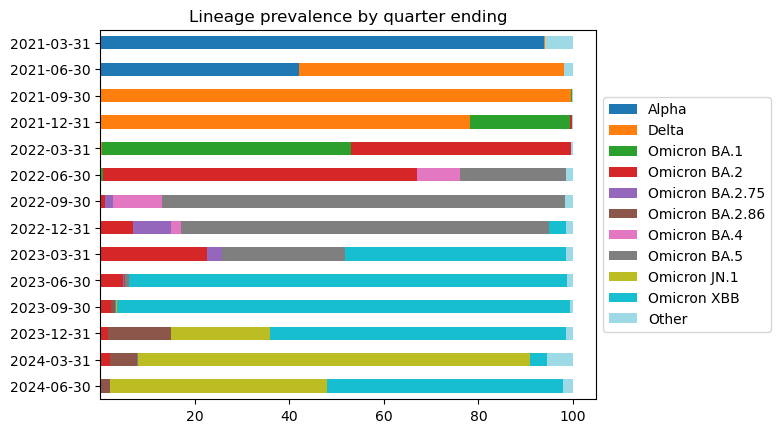

In [42]:
# we need a colormap with more than 11 colours 
ax=quarterly.plot(kind='barh', stacked=True,cmap='tab20')
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
# format the dates nicely
ax.set_yticklabels(quarterly.index.strftime('%Y-%m-%d'))
ax.set_title('Lineage prevalence by quarter ending');

## How to get ~~yourself~~ your data into a pickle (file)

In the actual dashboard, at this point, there is no need to save the dataframes - you can just add interactive controls to the graphs as you plot them. While developing, however, we want to save the wrangled data in order to be able to experiment with the controls. Pandas luckily makes it easy by providing a method that saves a ```DataFrame``` to a "pickle" file. This is based on the ```pickle``` [library](https://docs.python.org/3/library/pickle.html), that however is imported by ```pandas```, so you do not need to import it yourself. While JSON is a standard format that is language-independent, a *pickle* file is Python-specific. This format is thus more flexible, allowing the [serialisation](https://en.wikipedia.org/wiki/Serialization) of a broader range of Python objects; however, it is less portable.

In [43]:
# pandas makes saving to a pickle file dead easy:
timeseriesdf.to_pickle("timeseriesdf.pkl")
lineagedf.to_pickle("lineagedf.pkl")

## Your turn

Load the data you saved in the JSON files, munge it, turn it into a ```DataFrame``` and display it; then save your ```DataFrame``` to a *pickle* file. In the next notebook, when we will show you how to add interactive controls to your graphs. 

**(C) 2020,2024 Fabrizio Smeraldi** ([f.smeraldi@qmul.ac.uk](mailto:f.smeraldi@qmul.ac.uk) - [web](http://www.eecs.qmul.ac.uk/~fabri/)). This notebook is released under the [GNU GPLv3.0 or later](https://www.gnu.org/licenses/).